In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report







In [ ]:
insurance_data = pd.read_csv("/insurance 2.csv")
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [ ]:
insurance_data.shape

(1000, 7)

In [ ]:
print(insurance_data.info())
print(insurance_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max

In [ ]:
insurance_data.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [ ]:

for column in ['age', 'bmi', 'children', 'expenses']:
    skewness = insurance_data[column].skew()
    kurtosis = insurance_data[column].kurt()
    print(f"{column}: Skewness={skewness}, Kurtosis={kurtosis}")

age: Skewness=0.06767507825407218, Kurtosis=-1.2472714194074195
bmi: Skewness=0.11153632919320376, Kurtosis=-0.4114005735523385
children: Skewness=1.0199623897293604, Kurtosis=0.3940199872165029
expenses: Skewness=0.5451919347198354, Kurtosis=-0.2616537953959388



Outliers in 'age': 0 rows
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, expenses]
Index: []

Outliers in 'bmi': 9 rows
     age     sex   bmi  children smoker     region  expenses
116   58    male  49.1         0     no  southeast  11381.33
286   46  female  48.1         2     no  northeast   9432.93
401   47    male  47.5         1     no  southeast   8083.92

Outliers in 'children': 0 rows
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, expenses]
Index: []

Outliers in 'expenses': 139 rows
    age     sex   bmi  children smoker     region  expenses
14   27    male  42.1         0    yes  southeast  39611.76
19   30    male  35.3         0    yes  southwest  36837.47
23   34  female  31.9         1    yes  northeast  37701.88


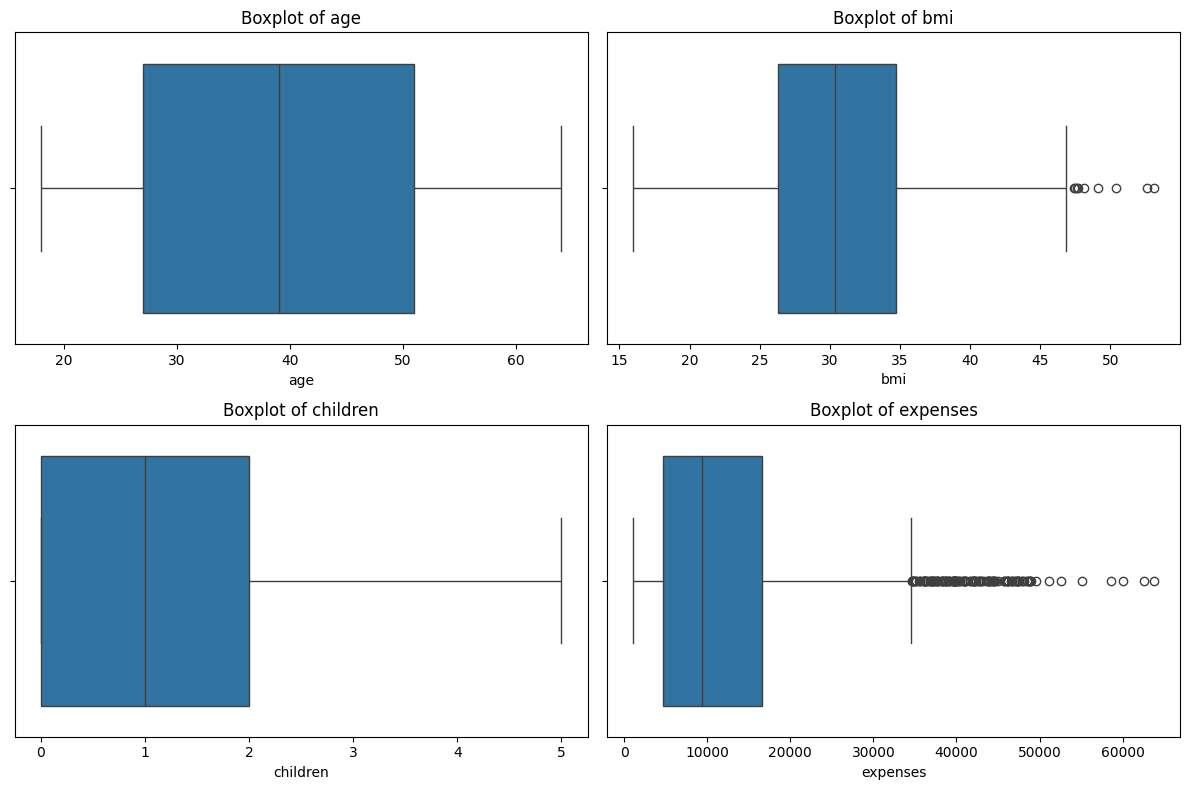

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/insurance.csv')

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


columns_to_check = ['age', 'bmi', 'children', 'expenses']


plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')


    outliers = detect_outliers_iqr(df, col)
    print(f"\nOutliers in '{col}': {len(outliers)} rows")
    print(outliers.head(3))

plt.tight_layout()
plt.show()


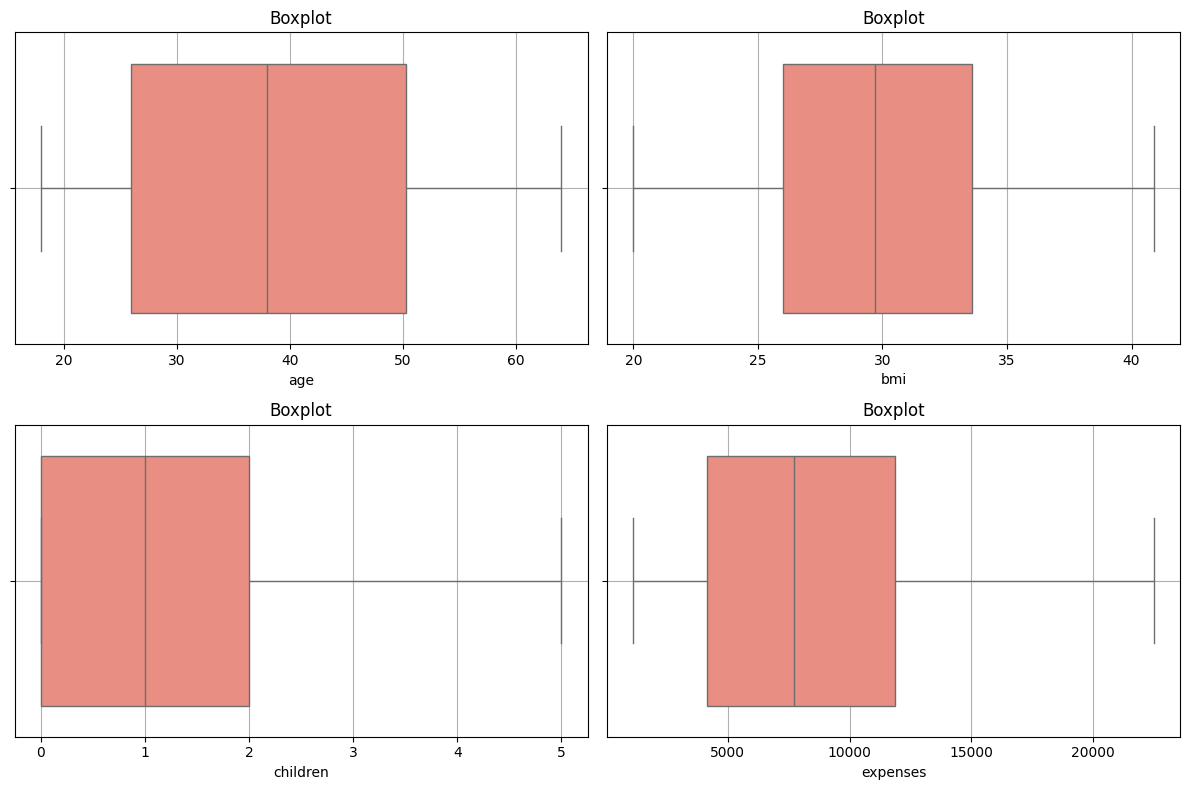

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/insurance.csv')


def remove_outliers_iqr(data, column, multiplier=0.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


df_cleaned = remove_outliers_iqr(df, column='bmi', multiplier=0.75)


df_cleaned = remove_outliers_iqr(df_cleaned, column='expenses', multiplier=0.5)


plt.figure(figsize=(12, 8))
columns_to_check = ['age', 'bmi', 'children', 'expenses']

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[col], color='salmon')
    plt.title(f'Boxplot')
    plt.xlabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()


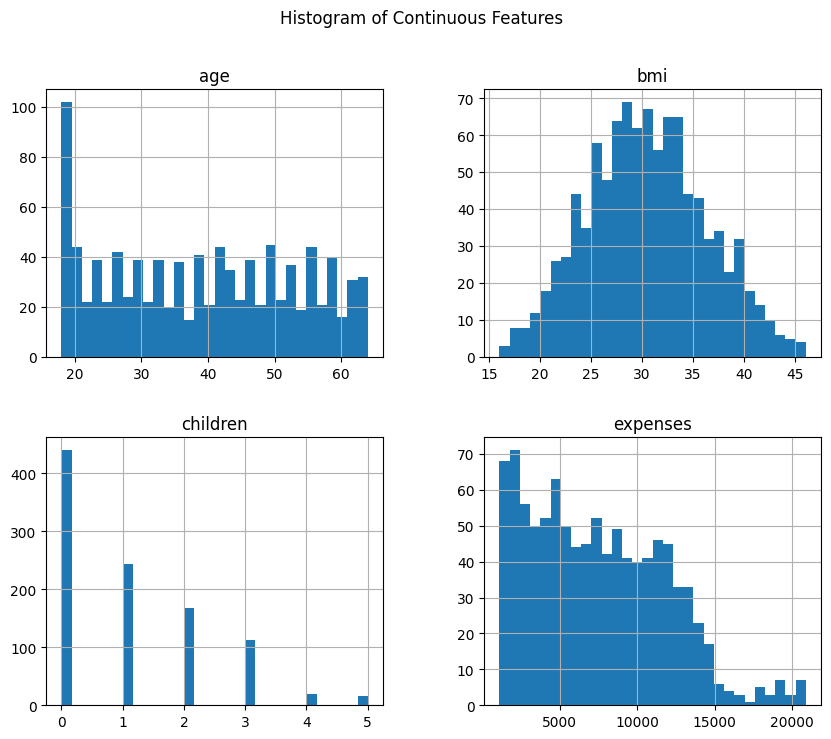

In [ ]:
insurance_data[['age', 'bmi', 'children', 'expenses']].hist(bins=30, figsize=(10, 8))
plt.suptitle("Histogram of Continuous Features")
plt.show()


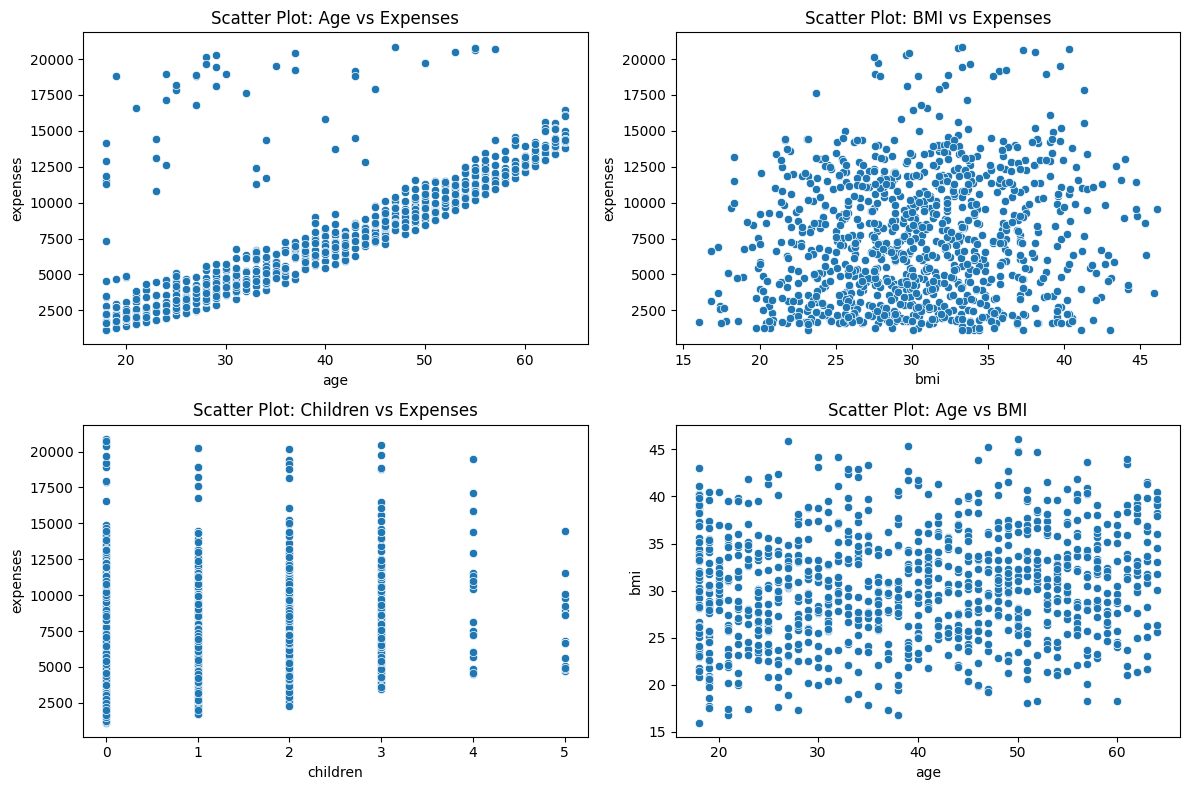

In [ ]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=insurance_data['age'], y=insurance_data['expenses'])
plt.title("Scatter Plot: Age vs Expenses")

plt.subplot(2, 2, 2)
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['expenses'])
plt.title("Scatter Plot: BMI vs Expenses")

plt.subplot(2, 2, 3)
sns.scatterplot(x=insurance_data['children'], y=insurance_data['expenses'])
plt.title("Scatter Plot: Children vs Expenses")

plt.subplot(2, 2, 4)
sns.scatterplot(x=insurance_data['age'], y=insurance_data['bmi'])
plt.title("Scatter Plot: Age vs BMI")

plt.tight_layout()
plt.show()


Linear Regression: MSE=0.12631328120367008, R2 Score=0.7586435486472011
Random Forest: MSE=0.1357473335348169, R2 Score=0.7406171830043771
Support Vector Regressor: MSE=0.13940880789300605, R2 Score=0.733620923787685
Neural Network: MSE=0.13178771684390267, R2 Score=0.7481831255887947


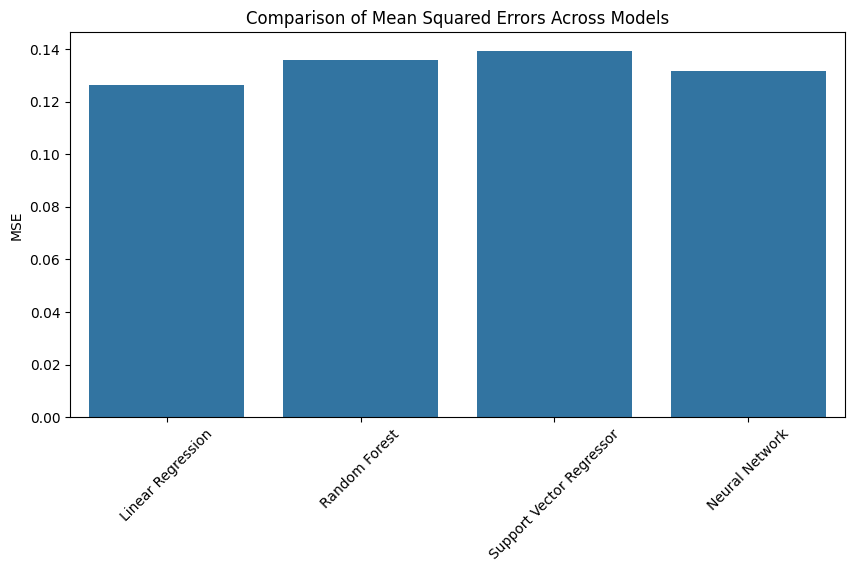

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=10, epsilon=0.01),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
}

mse_scores = {}
r2_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mse_scores[name] = mse
    r2_scores[name] = r2
    print(f"{name}: MSE={mse}, R2 Score={r2}")


plt.figure(figsize=(10, 5))
sns.barplot(x=list(mse_scores.keys()), y=list(mse_scores.values()))
plt.title("Comparison of Mean Squared Errors Across Models")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np


df = pd.read_csv('/insurance.csv')

def categorize_expense(expense):
    if expense < 5000:
        return 'Low'
    elif expense < 15000:
        return 'Medium'
    else:
        return 'High'

df['expense_category'] = df['expenses'].apply(categorize_expense)


df = df.drop('expenses', axis=1)


label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop('expense_category', axis=1)
y = df['expense_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        70
           1       0.87      0.93      0.90        84
           2       0.88      0.94      0.91       114

    accuracy                           0.90       268
   macro avg       0.91      0.88      0.89       268
weighted avg       0.90      0.90      0.89       268




Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        70
           1       0.87      0.93      0.90        84
           2       0.88      0.94      0.91       114

    accuracy                           0.90       268
   macro avg       0.91      0.88      0.89       268
weighted avg       0.90      0.90      0.89       268



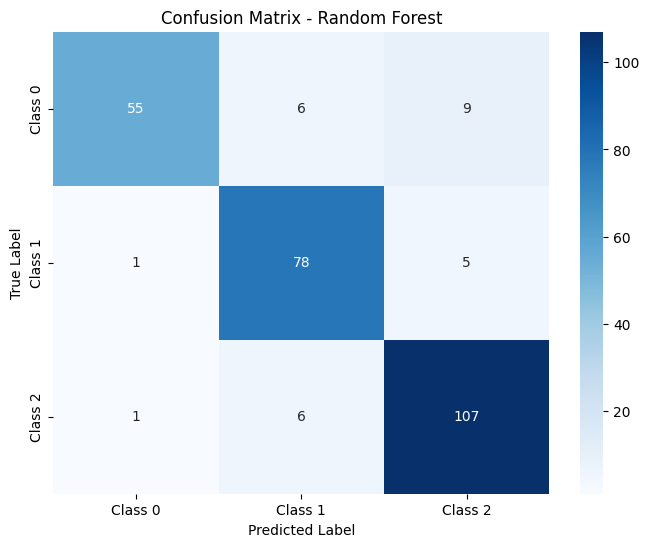


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        70
           1       0.91      0.93      0.92        84
           2       0.87      0.97      0.92       114

    accuracy                           0.91       268
   macro avg       0.92      0.89      0.90       268
weighted avg       0.91      0.91      0.91       268



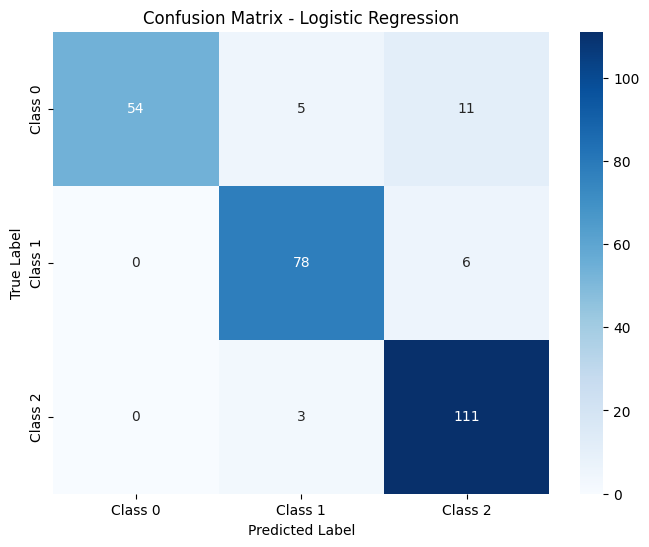


Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        70
           1       0.88      0.96      0.92        84
           2       0.89      0.96      0.92       114

    accuracy                           0.91       268
   macro avg       0.92      0.90      0.91       268
weighted avg       0.92      0.91      0.91       268



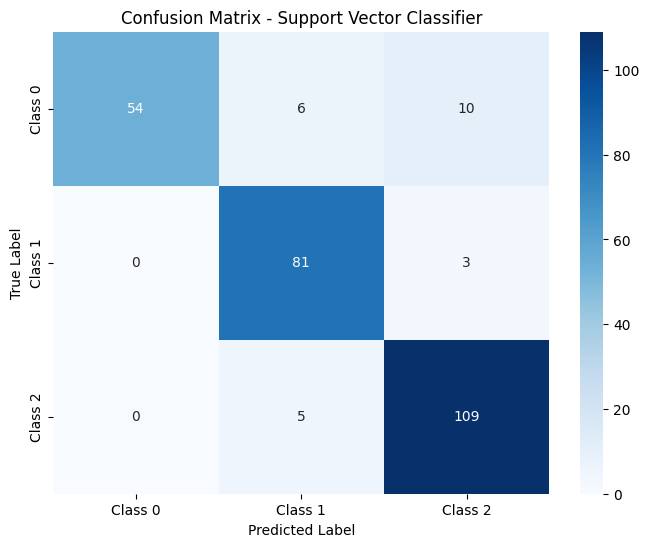


Neural Network Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.80      0.89        70
           1       0.90      0.96      0.93        84
           2       0.90      0.96      0.93       114

    accuracy                           0.92       268
   macro avg       0.93      0.91      0.92       268
weighted avg       0.93      0.92      0.92       268



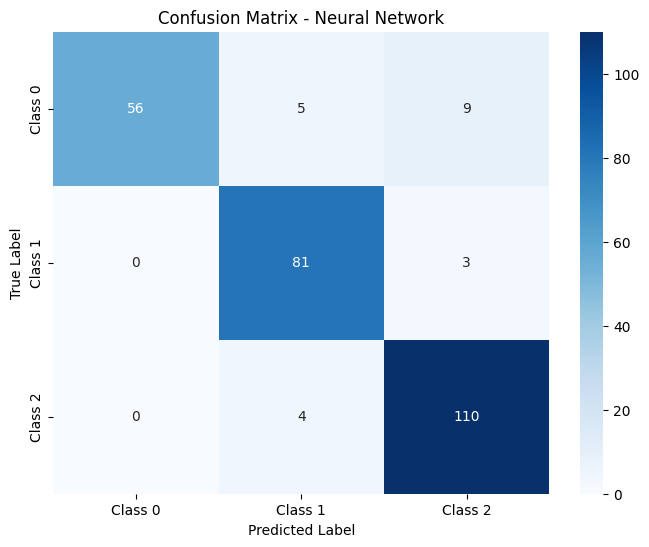

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/insurance.csv')

def categorize_expense(expense):
    if expense < 5000:
        return 'Low'
    elif expense < 15000:
        return 'Medium'
    else:
        return 'High'

df['expense_category'] = df['expenses'].apply(categorize_expense)
df = df.drop('expenses', axis=1)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('expense_category', axis=1)
y = df['expense_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500, tol=1e-4)
}

class_names = ['Class 0', 'Class 1', 'Class 2']

for name, model in models.items():
    print(f"\n{name} Classification Report:")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/insurance.csv')

def categorize_expense(expense):
    if expense < 5000:
        return 'Low'
    elif expense < 15000:
        return 'Medium'
    else:
        return 'High'

df['expense_category'] = df['expenses'].apply(categorize_expense)
df = df.drop('expenses', axis=1)

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('expense_category', axis=1)
y = df['expense_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500, tol=1e-4)
}

class_names = label_encoders['expense_category'].classes_

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred, labels=label_encoders['expense_category'].transform(class_names))
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print(f"\nConfusion Matrix - {name}:\n")
    print(cm_df)



Confusion Matrix - Random Forest:

        High  Low  Medium
High      55    6       9
Low        1   78       5
Medium     1    6     107

Confusion Matrix - Logistic Regression:

        High  Low  Medium
High      54    5      11
Low        0   78       6
Medium     0    3     111

Confusion Matrix - Support Vector Classifier:

        High  Low  Medium
High      54    6      10
Low        0   81       3
Medium     0    5     109

Confusion Matrix - Neural Network:

        High  Low  Medium
High      56    5       9
Low        0   81       3
Medium     0    4     110


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
